## Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import csv
import requests
from io import StringIO
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')
nltk.download('punkt_tab')
# Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Loading Dataset

In [3]:
df_reviews = pd.read_csv('ulasan_chatgpt.csv')
df_reviews.shape
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,33d442ed-8463-4ec1-9708-633a5e72f0aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo tim OpenAI, Saya pengguna ChatGPT Android...",3,7,1.2025.091,2025-04-09 04:22:32,NaN,NaN,1.2025.091
1,8513468e-f888-407a-98ba-bb130f612ff4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,overall bagus banget tapi ada satu kekurangan ...,1,20,1.2025.091,2025-04-08 09:11:43,NaN,NaN,1.2025.091
2,55ef8135-00e6-4df6-975d-8fe2a01d279f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maaf ya kasih segini, dulu nulis cerita lancar...",4,15,1.2025.091,2025-04-08 11:38:59,NaN,NaN,1.2025.091
3,c3a261c8-d5c2-4cd0-812e-38f09ffce33f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saran fitur: Mohon tambahkan opsi agar tombol ...,5,80,1.2025.091,2025-04-08 23:41:34,NaN,NaN,1.2025.091
4,5a2b81c9-aff8-46d0-8b2d-dbbc955ee3b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa pas dulu sebelum aku update aku minta k...,3,57,1.2025.077,2025-03-29 16:51:02,NaN,NaN,1.2025.077


In [4]:
# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = df_reviews.shape
df_reviews.shape

(30000, 11)

In [5]:
# Menampilkan lima baris pertama dari DataFrame df_reviews
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,33d442ed-8463-4ec1-9708-633a5e72f0aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo tim OpenAI, Saya pengguna ChatGPT Android...",3,7,1.2025.091,2025-04-09 04:22:32,NaN,NaN,1.2025.091
1,8513468e-f888-407a-98ba-bb130f612ff4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,overall bagus banget tapi ada satu kekurangan ...,1,20,1.2025.091,2025-04-08 09:11:43,NaN,NaN,1.2025.091
2,55ef8135-00e6-4df6-975d-8fe2a01d279f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Maaf ya kasih segini, dulu nulis cerita lancar...",4,15,1.2025.091,2025-04-08 11:38:59,NaN,NaN,1.2025.091
3,c3a261c8-d5c2-4cd0-812e-38f09ffce33f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saran fitur: Mohon tambahkan opsi agar tombol ...,5,80,1.2025.091,2025-04-08 23:41:34,NaN,NaN,1.2025.091
4,5a2b81c9-aff8-46d0-8b2d-dbbc955ee3b5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa pas dulu sebelum aku update aku minta k...,3,57,1.2025.077,2025-03-29 16:51:02,NaN,NaN,1.2025.077


In [6]:
# Menampilkan informasi tentang DataFrame df_reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30000 non-null  object
 1   userName              30000 non-null  object
 2   userImage             30000 non-null  object
 3   content               30000 non-null  object
 4   score                 30000 non-null  int64 
 5   thumbsUpCount         30000 non-null  int64 
 6   reviewCreatedVersion  26567 non-null  object
 7   at                    30000 non-null  object
 8   replyContent          9 non-null      object
 9   repliedAt             9 non-null      object
 10  appVersion            26567 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [7]:
# Hapus duplikasi berdasarkan 'content' dan NaN pada 'content' dan 'score'
clean_df = df_reviews.drop_duplicates(subset='content')
clean_df = clean_df.dropna(subset=['content', 'score'])

# Pilih kolom yang dibutuhkan ('content' dan 'score') dan pastikan tidak ada NaN
clean_df = clean_df[['content', 'score']].dropna()

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23948 entries, 0 to 29996
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  23948 non-null  object
 1   score    23948 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 561.3+ KB


In [8]:
clean_df.head()

,content,score
0,"Halo tim OpenAI, Saya pengguna ChatGPT Android...",3
1,overall bagus banget tapi ada satu kekurangan ...,1
2,"Maaf ya kasih segini, dulu nulis cerita lancar...",4
3,Saran fitur: Mohon tambahkan opsi agar tombol ...,5
4,Kenapa pas dulu sebelum aku update aku minta k...,3


### Preprocessing

In [9]:
# Fungsi untuk membersihkan teks dari mention, hashtag, link, angka, dan simbol
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # menghapus mention (@username)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # menghapus hashtag (#tag)
    text = re.sub(r'RT[\s]', '', text)  # menghapus RT
    text = re.sub(r"http\S+", '', text)  # menghapus link
    text = re.sub(r'[0-9]+', '', text)  # menghapus angka
    text = re.sub(r'[^\w\s]', '', text)  # menghapus simbol/non-alphanumeric

    text = text.replace('\n', ' ')  # mengganti newline menjadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # menghapus semua tanda baca
    text = text.strip()  # menghapus spasi di awal dan akhir

    return text

# Fungsi untuk mengubah semua huruf menjadi huruf kecil (lowercase)
def casefoldingText(text):
    return text.lower()

# Fungsi untuk tokenisasi teks, memecah kalimat menjadi kata-kata
def tokenizingText(text):
    return word_tokenize(text)

# Fungsi untuk menghapus stopwords (kata-kata yang tidak penting) dari teks
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))  # stopwords bahasa Indonesia
    listStopwords1 = set(stopwords.words('english'))  # stopwords bahasa Inggris
    listStopwords.update(listStopwords1)  # gabung stopwords Indonesia dan Inggris
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', "di", "ga", "ya", "gaa", 'loh', 'kah', 'woi', 'woii', 'woy'])  # custom stopwords

    filtered = [txt for txt in text if txt not in listStopwords]  # filter kata-kata yang ada di stopwords
    return filtered

# Fungsi untuk melakukan stemming (mengembalikan kata ke bentuk dasar)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()  # memecah teks menjadi kata-kata
    stemmed_words = [stemmer.stem(word) for word in words]  # menerapkan stemming pada setiap kata
    return ' '.join(stemmed_words)  # menggabungkan kata yang telah distem

# Fungsi untuk menggabungkan list kata menjadi satu kalimat
def toSentence(list_words):
    return ' '.join(list_words)

In [10]:
# Dictionary slangwords yang menghubungkan kata slang dengan bentuk bakunya
import requests

# Ambil slangwords dari GitHub dan Masukan ke variable 'slangwords'
response = requests.get("https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/refs/heads/master/combined_slang_words.txt")

slangwords = {}
if response.status_code == 200:
    lines = response.text.strip().split('\n')
    for line in lines:
        if '\t' in line:
            slang, formal = line.strip().split('\t')
            slangwords[slang.lower()] = formal.lower()
else:
    print("Gagal mengambil slangwords dari GitHub.")


# Fungsi untuk mengganti kata slang dengan bentuk bakunya
def fix_slangwords(text):
    words = text.split()  # Memecah teks menjadi list kata
    fixed_words = []  # Tempat untuk menyimpan kata yang sudah diperbaiki

    # Looping setiap kata dalam teks
    for word in words:
        # Cek apakah kata ada di dalam slangwords
        if word.lower() in slangwords:
            # Jika ada, ganti dengan bentuk bakunya
            fixed_words.append(slangwords[word.lower()])
        else:
            # Kalau tidak ada, tambahkan kata tersebut tanpa perubahan
            fixed_words.append(word)

    # Gabungkan kembali kata-kata yang sudah diperbaiki menjadi kalimat
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [11]:
# Membersihkan teks dengan fungsi cleaningText
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah seluruh huruf dalam teks menjadi huruf kecil (case folding)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata slang dengan kata standar menggunakan fungsi fix_slangwords
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) menggunakan fungsi tokenizingText
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata umum yang tidak memiliki makna penting) menggunakan fungsi filteringText
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat kembali menggunakan fungsi toSentence
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [12]:
# Menampilkan beberapa baris dari hasil preprocessing
clean_df[['content', 'text_clean', 'text_casefoldingText', 'text_slangwords',
          'text_tokenizingText', 'text_stopword', 'text_akhir']].head()

,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"Halo tim OpenAI, Saya pengguna ChatGPT Android...",Halo tim OpenAI Saya pengguna ChatGPT Android ...,halo tim openai saya pengguna chatgpt android ...,halo tim openai saya pengguna chatgpt android ...,"[halo, tim, openai, saya, pengguna, chatgpt, a...","[halo, tim, openai, pengguna, chatgpt, android...",halo tim openai pengguna chatgpt android pemba...
1,overall bagus banget tapi ada satu kekurangan ...,overall bagus banget tapi ada satu kekurangan ...,overall bagus banget tapi ada satu kekurangan ...,overall bagus banget tapi ada satu kekurangan ...,"[overall, bagus, banget, tapi, ada, satu, keku...","[overall, bagus, banget, kekurangan, memori, s...",overall bagus banget kekurangan memori smisal ...
2,"Maaf ya kasih segini, dulu nulis cerita lancar...",Maaf ya kasih segini dulu nulis cerita lancarl...,maaf ya kasih segini dulu nulis cerita lancarl...,maaf ya kasih segini dulu nulis cerita lancarl...,"[maaf, ya, kasih, segini, dulu, nulis, cerita,...","[maaf, kasih, segini, nulis, cerita, lancarlan...",maaf kasih segini nulis cerita lancarlancar aj...
3,Saran fitur: Mohon tambahkan opsi agar tombol ...,Saran fitur Mohon tambahkan opsi agar tombol E...,saran fitur mohon tambahkan opsi agar tombol e...,saran fitur mohon tambahkan opsi agar tombol e...,"[saran, fitur, mohon, tambahkan, opsi, agar, t...","[saran, fitur, mohon, tambahkan, opsi, tombol,...",saran fitur mohon tambahkan opsi tombol enter ...
4,Kenapa pas dulu sebelum aku update aku minta k...,Kenapa pas dulu sebelum aku update aku minta k...,kenapa pas dulu sebelum aku update aku minta k...,kenapa pas dulu sebelum aku update aku minta k...,"[kenapa, pas, dulu, sebelum, aku, update, aku,...","[pas, update, ai, bikin, cerita, deskripsikan,...",pas update ai bikin cerita deskripsikan fine f...


In [13]:
import requests

# Load positive lexicon
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt')

if response.status_code == 200:
    for word in response.text.strip().split('\n'):
        lexicon_positive[word.strip()] = 1  # kasih skor 1 buat kata positif
else:
    print("Failed to fetch positive lexicon data")

# Load negative lexicon
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt')

if response.status_code == 200:
    for word in response.text.strip().split('\n'):
        lexicon_negative[word.strip()] = -1  # kasih skor -1 buat kata negatif
else:
    print("Failed to fetch negative lexicon data")

In [14]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Inisialisasi skor sentimen ke 0

    # Loop untuk memeriksa kata-kata dalam teks
    for word in text:
        if word in lexicon_positive:
            score += 1
        elif word in lexicon_negative:
            score -= 1

    # Tentukan polaritas berdasarkan nilai skor
    if score > 0:
        polarity = 'positive'  # Jika skor lebih besar dari 0, maka polaritasnya positif
    elif score < 0:
        polarity = 'negative'  # Jika skor lebih kecil dari 0, maka polaritasnya negatif
    else:
        polarity = 'neutral'  # Jika skor sama dengan 0, maka polaritasnya netral

    # Kembalikan skor dan polaritas yang ditentukan
    return score, polarity

In [15]:
# Menganalisis sentimen dari kolom 'text_stopword' yang sudah terisi token-token
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Memisahkan hasil tuple (score, polarity) jadi dua list terpisah
results = list(zip(*results))

# Memasukan hasil ke dataframe
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Lihat distribusi polaritas
print(clean_df['polarity'].value_counts())

polarity
positive    14915
neutral      7170
negative     1863
Name: count, dtype: int64


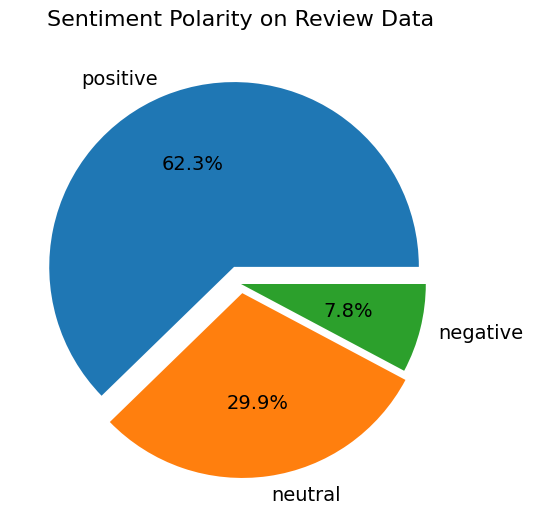

In [16]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci
fig, ax = plt.subplots(figsize=(6, 6))

# Ambil distribusi polaritas
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0.05, 0)  # Untuk positive, negative, neutral

# Membuat pie chart
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Judul pie chart
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Tampilkan
plt.show()

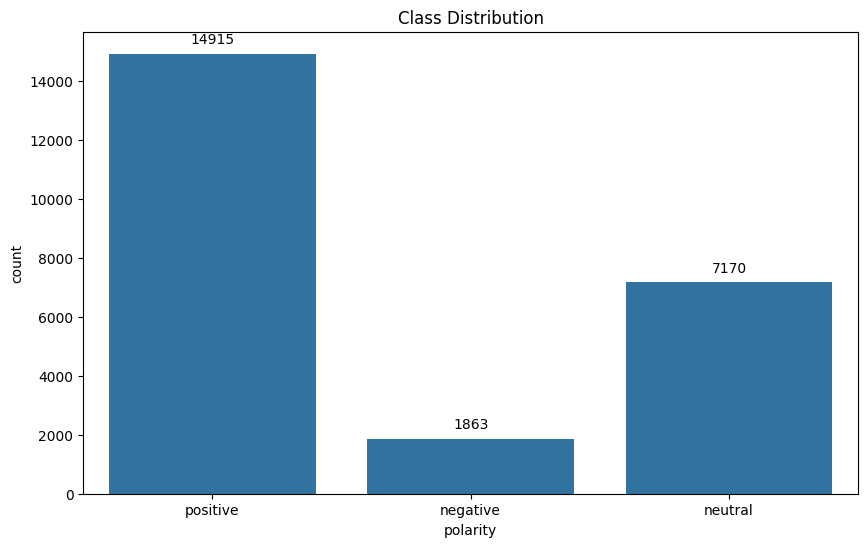

<Axes: xlabel='text_length', ylabel='Count'>

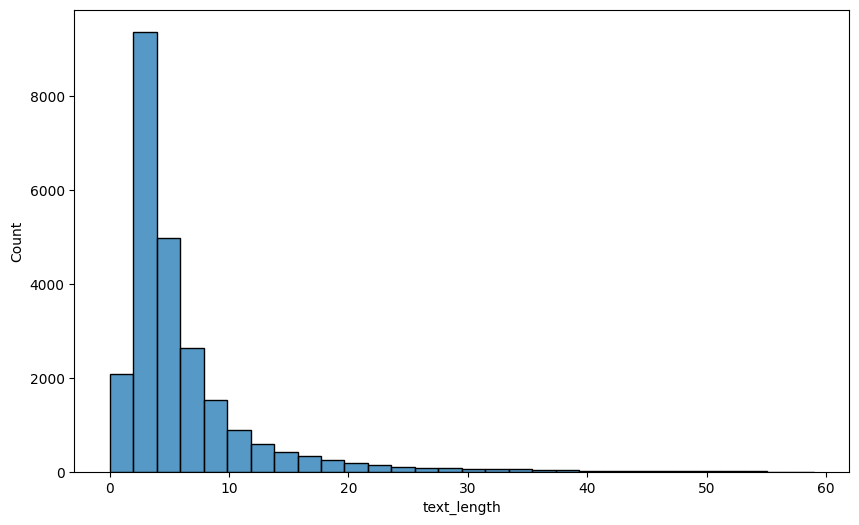

In [17]:
# Atur ukuran plot
plt.figure(figsize=(10, 6))

# Plot jumlah tweet per kelas sentimen
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Tambahkan angka di atas tiap bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.show()

# Tambahkan kolom panjang teks (jumlah kata)
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Atur ukuran plot
plt.figure(figsize=(10, 6))

# Plot distribusi panjang teks
sns.histplot(clean_df['text_length'], bins=30)


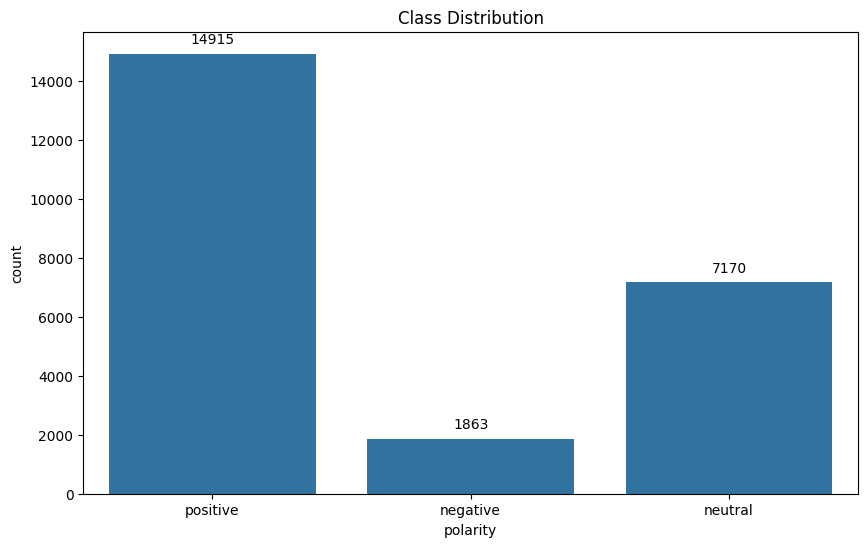

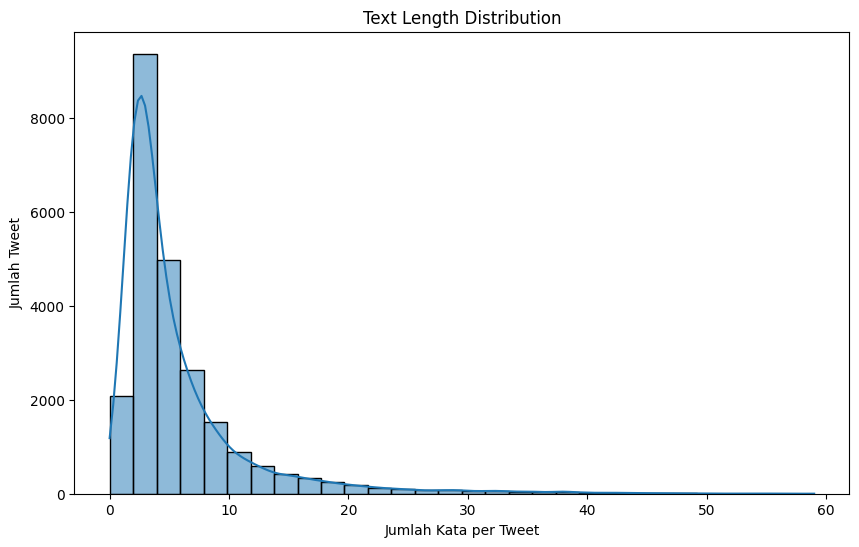

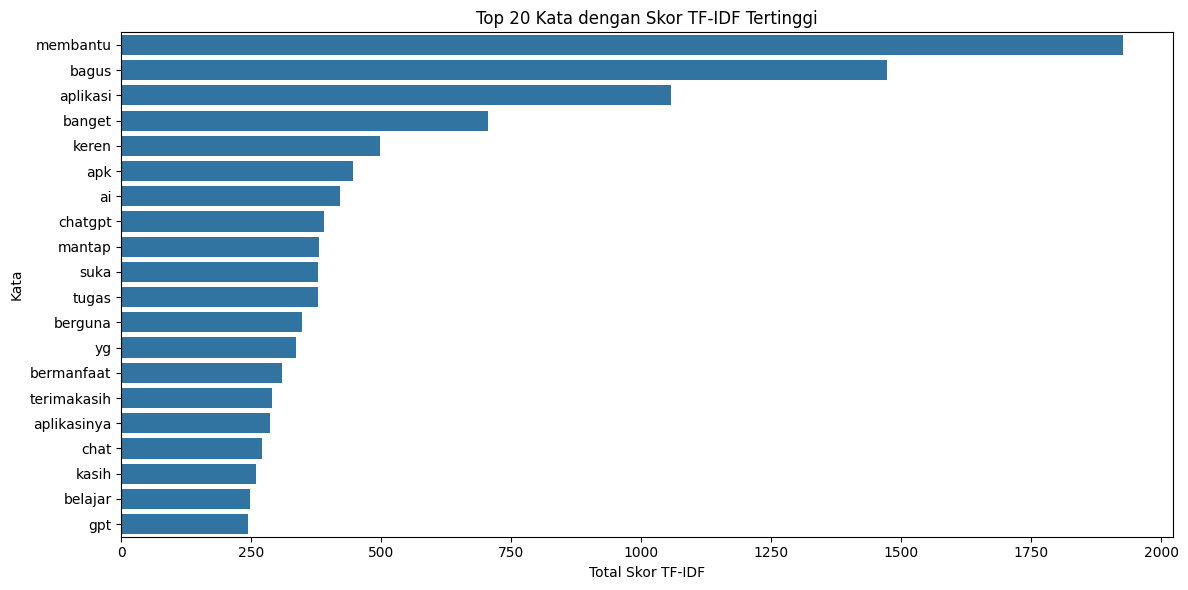

In [18]:
plt.figure(figsize=(10, 6))

# Membuat barplot jumlah tweet berdasarkan polaritas
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Menampilkan jumlah tweet di atas tiap bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.show()

plt.figure(figsize=(10, 6))

# Hitung jumlah kata per tweet
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))

# Visualisasikan distribusi panjang teks
sns.histplot(clean_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Jumlah Kata per Tweet')
plt.ylabel('Jumlah Tweet')
plt.show()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transformasi teks tweet jadi matriks TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(clean_df['text_akhir'])

# Buat DataFrame dari hasil TF-IDF
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Jumlahkan skor TF-IDF untuk setiap kata
tfidf_top = tfidf_df.sum().reset_index()
tfidf_top.columns = ['kata', 'jumlah']

# Ambil 20 kata dengan skor TF-IDF tertinggi
tfidf_top = tfidf_top.sort_values('jumlah', ascending=False).head(20)

# Plot barplot kata-kata dengan skor TF-IDF tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(data=tfidf_top, y='kata', x='jumlah')
plt.title('Top 20 Kata dengan Skor TF-IDF Tertinggi')
plt.xlabel('Total Skor TF-IDF')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()


In [19]:
# Teks di kolom bisa tampil panjang (hingga 3000 karakter)
pd.set_option('display.max_colwidth', 3000)

# Filter tweet yang polaritasnya positif
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Ambil kolom yang relevan
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Urutkan tweet berdasarkan skor polaritas paling tinggi
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Reset index agar mulai dari 0
positive_tweets = positive_tweets.reset_index(drop=True)

# Naikin semua index +1 agar mulai dari 1
positive_tweets.index += 1

In [20]:
# Teks di kolom bisa tampil panjang (hingga 3000 karakter)
pd.set_option('display.max_colwidth', 3000)

# Ambil tweet yang polaritasnya negatif
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Ambil kolom yang penting
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Urutkan dari skor paling kecil (yang paling negatif)
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Ambil 10 tweet pertama yang paling negatif
negative_tweets = negative_tweets[0:10]

# Reset index agar mulai dari 0
negative_tweets = negative_tweets.reset_index(drop=True)

# Naikan index agar mulai dari 1
negative_tweets.index += 1

In [21]:
# Teks di kolom bisa tampil panjang (hingga 3000 karakter)
pd.set_option('display.max_colwidth', 3000)

# Ambil tweet yang polaritasnya netral
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Ambil kolom yang penting
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Urutkan dari skor terendah
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Ambil 10 tweet pertama yang paling netral
neutral_tweets = neutral_tweets[0:10]

# Reset index agar mulai dari 0
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Naikan index agar mulai dari 1
neutral_tweets.index += 1

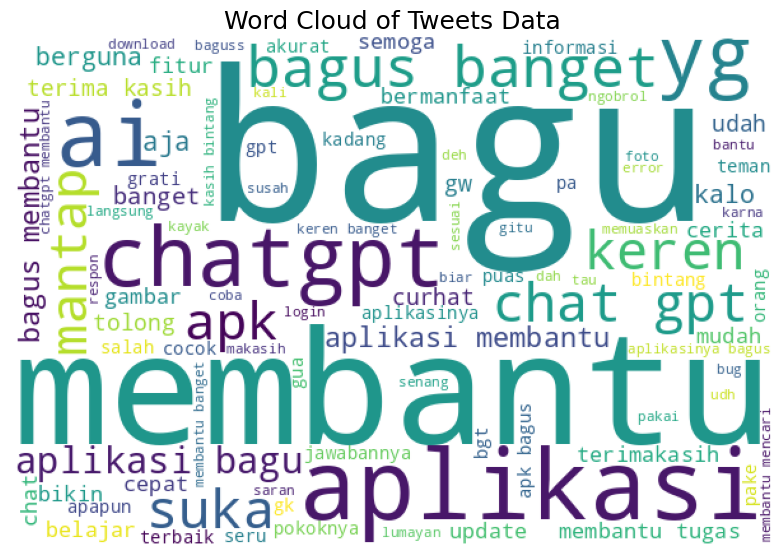

In [22]:
# Membuat string kosong 'list_words' untuk menggabungkan semua kata dari tweet yang telah dibersihkan
list_words = ''

# Iterasi setiap tweet dalam kolom 'text_stopword' dari DataFrame 'clean_df'
for tweet in clean_df['text_stopword'][:100000]:
    # Iterasi setiap kata dalam tweet
    for word in tweet:
        # Tambahkan setiap kata ke variabel 'list_words' dengan spasi sebagai pemisah
        list_words += ' ' + word

# Membuat objek WordCloud dengan lebar, tinggi, warna latar, dan ukuran font minimum yang ditentukan
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk visualisasi word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul grafik
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud ke dalam visualisasi
ax.imshow(wordcloud)

# Mengatur layout agar lebih rapat dan tanpa padding tambahan
fig.tight_layout(pad=0)

# Menyembunyikan sumbu (x dan y) agar fokus ke word cloud
ax.axis('off')

# Menampilkan hasil word cloud
plt.show()

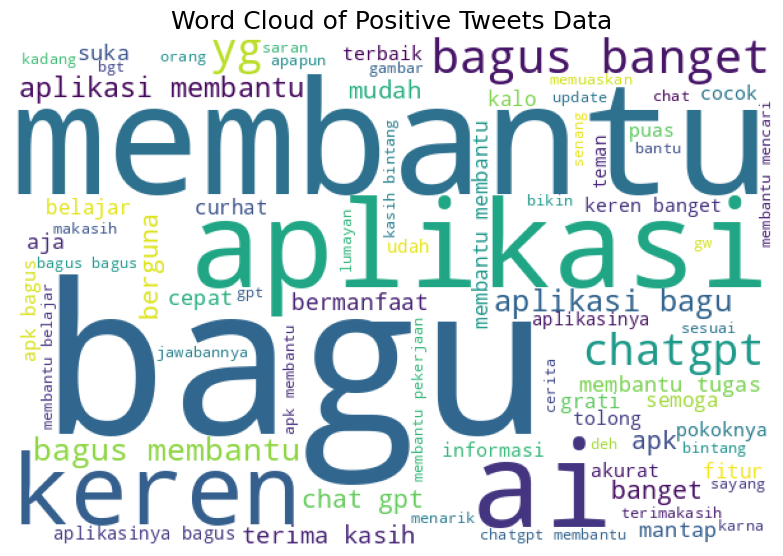

In [23]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'
for tweet in positive_tweets['text_stopword'][:100000]:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud.
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow((wordcloud))

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

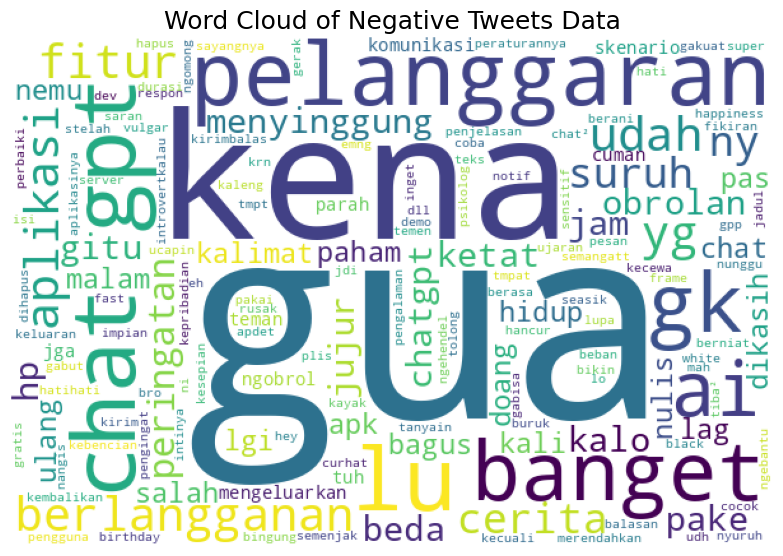

In [24]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'
for tweet in negative_tweets['text_stopword'][:100000]:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow((wordcloud))

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

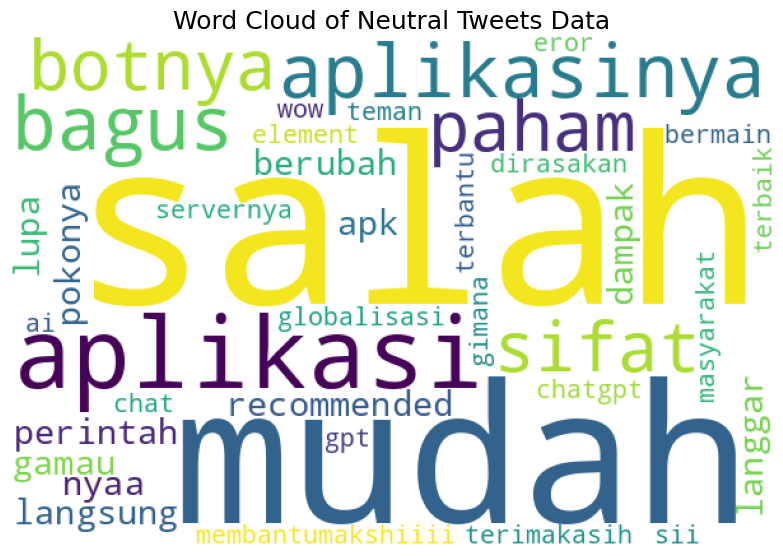

In [25]:
# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'
for tweet in neutral_tweets['text_stopword'][:100000]:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(
    width=600,
    height=400,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Menampilkan WordCloud
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud)
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


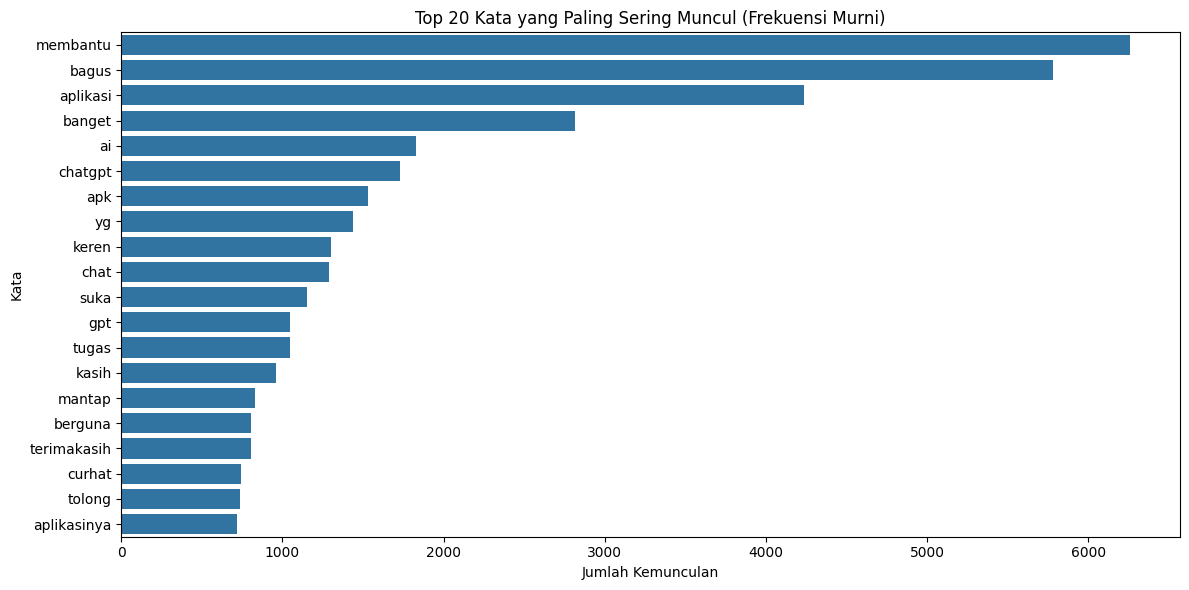

In [26]:
# Inisialisasi CountVectorizer (hitung frekuensi murni)
count_vectorizer = CountVectorizer()

# Transformasi teks tweet jadi matriks Count
X_count = count_vectorizer.fit_transform(clean_df['text_akhir'])

# Buat DataFrame dari hasil Count
count_df = pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out())

# Jumlahkan frekuensi tiap kata
count_top = count_df.sum().reset_index()
count_top.columns = ['kata', 'jumlah']

# Ambil 20 kata yang paling sering muncul
count_top = count_top.sort_values('jumlah', ascending=False).head(20)

# Plot barplot kata-kata yang paling sering muncul
plt.figure(figsize=(12, 6))
sns.barplot(data=count_top, y='kata', x='jumlah')
plt.title('Top 20 Kata yang Paling Sering Muncul (Frekuensi Murni)')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata')
plt.tight_layout()
plt.show()

###Data Splitting

In [27]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,ai,aja,ajak,akun,akurat,anak,apapun,apk,apknya,aplikasi,...,tolong,tugas,udah,udh,ujian,update,versi,wajib,wawasan,yg
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.260976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.254481,0.0,0.265869,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.185778,0.0,0.0,0.0,0.0
4,0.155458,0.387282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.188822,0.0,0.197271,0.0,0.0,0.211302,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23943,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
23944,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
23945,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
23946,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Pelatihan Model dengan 2 Kombinasi

### Evaluasi Model SVM + TF-IDF (80/20)

In [28]:
# Bagi data jadi train dan test (80% latih, 20% uji)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Buat model SVM dengan kernel linear
svm_model = SVC(kernel='linear', probability=True)

# Latih model pakai data training
svm_model.fit(X_train_svm, y_train_svm)

# Prediksi label untuk data uji
y_pred_svm = svm_model.predict(X_test_svm)

# Cek akurasi pada data training dan testing
train_acc_svm = accuracy_score(y_train_svm, svm_model.predict(X_train_svm))
test_acc_svm = accuracy_score(y_test_svm, y_pred_svm)

# Tampilkan hasil evaluasi model
print("\nEvaluasi Model SVM + TF-IDF")
print(f'\nAkurasi Data Latih: {train_acc_svm:.4f}')
print(f'Akurasi Data Uji  : {test_acc_svm:.4f}')


Evaluasi Model SVM + TF-IDF

Akurasi Data Latih: 0.8850
Akurasi Data Uji  : 0.8802


### Evaluasi Model RF + TF-IDF (70/30)

In [29]:
# Bagi data (70% train, 30% test) untuk TF-IDF
X_train_rftfidf, X_test_rftfidf, y_train_rftfidf, y_test_rftfidf = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Buat model Random Forest
rf_model_tfidf = RandomForestClassifier(random_state=42)

# Latih model pada data training
rf_model_tfidf.fit(X_train_rftfidf, y_train_rftfidf)

# Lakukan prediksi
y_pred_rf_tfidf = rf_model_tfidf.predict(X_test_rftfidf)

# Cek performa model
train_acc_rf_tfidf = accuracy_score(y_train_rftfidf, rf_model_tfidf.predict(X_train_rftfidf))
test_acc_rf_tfidf = accuracy_score(y_test_rftfidf, y_pred_rf_tfidf)

# Tampilkan metrik evaluasi
print("\nEvaluasi Model RF + TF-IDF (70/30)")
print(f'\nAkurasi Data Latih: {train_acc_rf_tfidf:.4f}')
print(f'Akurasi Data Uji  : {test_acc_rf_tfidf:.4f}')


Evaluasi Model RF + TF-IDF (70/30)

Akurasi Data Latih: 0.9517
Akurasi Data Uji  : 0.8717


### Evaluasi Model RF + CountVectorizer (80/20)

In [30]:
# Ekstraksi fitur menggunakan CountVectorizer
count_vect = CountVectorizer(max_features=1000)
X_count = count_vect.fit_transform(X)

# Split data latih dan uji (80% latih, 20% uji)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_count, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest
rf_model_cv = RandomForestClassifier(random_state=42)

# Proses pelatihan model
rf_model_cv.fit(X_train_cv, y_train_cv)

# Prediksi pada data uji
y_pred_cv = rf_model_cv.predict(X_test_cv)

# Evaluasi performa model
train_acc_cv = accuracy_score(y_train_cv, rf_model_cv.predict(X_train_cv))
test_acc_cv = accuracy_score(y_test_cv, y_pred_cv)

# Output hasil evaluasi
print("\nEvaluasi Model RF + CountVectorizer (80/20)")
print(f'Train Accuracy: {train_acc_cv:.4f}')
print(f'Test Accuracy : {test_acc_cv:.4f}')



Evaluasi Model RF + CountVectorizer (80/20)
Train Accuracy: 0.9910
Test Accuracy : 0.9196


In [31]:
# Masukan akurasi yang sudah didapat dari masing-masing model
model_names = ['SVM + TF-IDF (80/20)',
               'Random Forest + TF-IDF (70/30)',
               'Random Forest + CountVectorizer (80/20)']

train_accuracies = [train_acc_svm,
                    train_acc_rf_tfidf,
                    train_acc_cv]

test_accuracies = [test_acc_svm,
                   test_acc_rf_tfidf,
                   test_acc_cv]

# Buat DataFrame
eval_df = pd.DataFrame({
    'Model': model_names,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
})

# Urutkan berdasarkan test accuracy tertinggi
eval_df_sorted = eval_df.sort_values(by='Test Accuracy', ascending=False)

# Tampilkan hasil
print("\nPerbandingan Evaluasi Model")
print(eval_df_sorted)



Perbandingan Evaluasi Model
                                     Model  Train Accuracy  Test Accuracy
2  Random Forest + CountVectorizer (80/20)        0.991022       0.919624
0                     SVM + TF-IDF (80/20)        0.885009       0.880167
1           Random Forest + TF-IDF (70/30)        0.951739       0.871677


Berdasarkan hasil evaluasi model, **Random Forest + CountVectorizer (80/20)** menunjukkan performa terbaik dengan akurasi tertinggi pada data latih 99.1% dan data uji 91.9%, menjadikannya model yang paling kuat di antara yang diuji.

Sementara itu, **SVM + TF-IDF (80/20)** memberikan hasil yang cukup stabil dengan akurasi data latih 88.5% dan data uji 88%.

**Random Forest + TF-IDF (70/30)** dengan akurasi data latih 95.2% dan data uji 87.1%, yang juga menunjukkan performa baik, meskipun sedikit lebih rendah dibandingkan Random Forest + CountVectorizer.

Secara keseluruhan, Random Forest + CountVectorizer (80/20) adalah model yang paling optimal, meskipun model lainnya juga memberikan hasil yang baik untuk klasifikasi sentimen ini.

In [32]:
import joblib

# Simpan model SVM + TF-IDF
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Simpan model RF + TF-IDF
joblib.dump(rf_model_tfidf, 'random_forest_model.pkl')

# Simpan model RF + CountVectorizer
joblib.dump(rf_model_cv, 'random_forest_cv_model.pkl')
joblib.dump(count_vect, 'count_vectorizer.pkl')

['count_vectorizer.pkl']